In [50]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

In [51]:
sessions = pd.read_csv('sessions.csv')
sessions = sessions.fillna(0)

# reformat dates
sessions['date'] = pd.to_datetime(sessions.date)

In [52]:
sessions.columns

Index(['date', 'monkey', 'cycle', 'phase', 'loc', 'kg', 'hang', 'core',
       'block', 'arc', 'anta', 'legs', 'L-Sit', 'tech', 'power', 'speed',
       'speed+', 'yoga', 'notes', 'stable', 'max_full', 'total', 'total6', '4',
       '5a', '5b', '5c', '6a', '6a+', '6b', '6b+', '6c', '6c+', '7a', '7a+',
       '4F2G', '3F2G', '16', '12', '15°', '35°', '45°', 'sloper', 'pinch',
       '2F2G'],
      dtype='object')

In [53]:
boulder_4 = 4
boulder_5a = 8
boulder_5b = 9
boulder_5c = 10

boulder_6a = 20
boulder_6a_plus = 21
boulder_6b = 30

boulder_6b_plus = 40
boulder_6c = 60
boulder_6c_plus = 70

boulder_7a = 100
boulder_7a_plus = 130

scores_translator = {
    # climbing
    '4': boulder_4,   
    '5a': boulder_5a,
    '5b': boulder_5b,
    '5c': boulder_5c,
    '6a': boulder_6a,
    '6a+': boulder_6a_plus,
    '6b': boulder_6b,
    '6b+': boulder_6b_plus,
    '6c': boulder_6c,
    '6c+': boulder_6c_plus,
    '7a': boulder_7a,
    '7a+': boulder_7a_plus,
    
    # gymnastics
    'block': boulder_6a_plus / 5,
    'core': boulder_6a / 5,
    'anta': boulder_5c / 5,
    'legs': boulder_5c / 5,
    'L-Sit': boulder_6b,
    
    # power phase
    'power': boulder_6b,
    'speed': boulder_6a_plus,
    'speed+': boulder_7a / 4,
    
    # yoga
    'yoga': boulder_6b / 5,
    
    # ARC
    'arc': boulder_6b_plus / 5,
    
    # technique
    'tech': boulder_6a_plus / 5,
    
    # Hangboard for each 10 seconds
    '4F2G': boulder_5c / 10,
    '3F2G': boulder_6a / 10,
    '2F2G': boulder_6a_plus / 10,
    
    # crimp in mm
    '16': boulder_6a_plus / 10,
    '12': boulder_6b_plus / 10,
    
    # slopers
    'sloper': boulder_6a / 10,
    '15°': boulder_6a / 10,
    '35°': boulder_6b_plus / 10,
    '45°': boulder_7a / 10,
    
    'pinch': boulder_6b_plus / 10,
}

hangboard = [
    '4F2G',
    '3F2G',
    '2F2G',
    '16',
    '12',
    'sloper',
    '15°',
    '35°',
    '45°',
    'pinch'
]

gymnastics = ['block', 'core', 'anta', 'legs', 'L-Sit',]
climbing = ['4', '5a', '5b', '5c', '6a', '6a+', '6b', '6b+', '6c', '6c+', '7a', '7a+',]


def calc_score(row):
    s = [row[key] * scores_translator[key] for key in scores_translator]
    return sum(s)


def calc_hangboard_scores(row):
    s = [row[key] * scores_translator[key] for key in hangboard]
    return sum(s)
        
    
def calc_gym_scores(row):
    s = [row[key] * scores_translator[key] for key in gymnastics]
    return sum(s)

def calc_climbing_scores(row):
    s = [row[key] * scores_translator[key] for key in climbing]
    return sum(s)

def calc_arc_scores(row):
    s = [row[key] * scores_translator[key] for key in ['arc']]
    return sum(s)

def calc_technique_scores(row):
    s = [row[key] * scores_translator[key] for key in ['tech']]
    return sum(s)

def calc_power_scores(row):
    s = [row[key] * scores_translator[key] for key in ['power', 'speed', 'speed+']]
    return sum(s)

def calc_yoga_scores(row):
    s = [row[key] * scores_translator[key] for key in ['yoga', ]]
    return sum(s)

In [54]:
scores = sessions.apply(calc_score, axis=1)
hangboard_scores = sessions.apply(calc_hangboard_scores, axis=1)
gym_scores = sessions.apply(calc_gym_scores, axis=1)
climbing_scores = sessions.apply(calc_climbing_scores, axis=1)
arc_scores = sessions.apply(calc_arc_scores, axis=1)
tech_scores = sessions.apply(calc_technique_scores, axis=1)
power_scores = sessions.apply(calc_power_scores, axis=1)
yoga_scores = sessions.apply(calc_yoga_scores, axis=1)

sessions['scores'] = scores
sessions['hang_scores'] = hangboard_scores
sessions['gym_scores'] = gym_scores
sessions['climbing_scores'] = climbing_scores
sessions['arc_scores'] = arc_scores
sessions['tech_scores'] = tech_scores
sessions['power_scores'] = power_scores
sessions['yoga_scores'] = yoga_scores

In [55]:
doripa = sessions[sessions.monkey == 'doripa']
sunshine_sessions = sessions[sessions.monkey == 'sunshine']

# Doripa: Five last entries

In [56]:
doripa.tail()[['climbing_scores', 'tech_scores', 'gym_scores', 'hang_scores', 'arc_scores']]

,climbing_scores,tech_scores,gym_scores,hang_scores,arc_scores
47,359.0,184.8,418.4,0.0,0.0
48,616.0,453.6,963.6,810.0,0.0
49,731.0,630.0,958.0,0.0,0.0
51,355.0,546.0,618.0,682.0,0.0
53,257.0,336.0,387.0,0.0,0.0


# Doripa: Maximal sessions

In [57]:
doripa[['climbing_scores', 'tech_scores', 'gym_scores', 'hang_scores', 'arc_scores']].max()

climbing_scores    1357.0
tech_scores         630.0
gym_scores          963.6
hang_scores         810.0
arc_scores          400.0
dtype: float64

# Sunshine: Last five scores

In [58]:
sunshine_sessions.tail()[['climbing_scores', 'tech_scores', 'gym_scores', 'hang_scores', 'arc_scores']]

,climbing_scores,tech_scores,gym_scores,hang_scores,arc_scores
43,0.0,0.0,0.0,396.0,0.0
44,279.0,0.0,412.0,453.0,0.0
46,230.0,155.4,0.0,0.0,0.0
50,325.0,420.0,452.0,438.0,0.0
52,187.0,210.0,364.0,0.0,0.0


# Sunshine: Maximal Sessions

In [59]:
sunshine_sessions[['climbing_scores', 'tech_scores', 'gym_scores', 'hang_scores', 'arc_scores']].max()

climbing_scores    556.0
tech_scores        420.0
gym_scores         452.0
hang_scores        453.0
arc_scores           0.0
dtype: float64

In [60]:
def plot_stacked_scores(athlete):
    plt.figure(figsize=(20,10))
    
    x = np.arange(len(athlete))
    
    athlete['additional_index'] = x
    scores = [
        athlete.climbing_scores,
        athlete.yoga_scores,

        athlete.tech_scores,
        athlete.power_scores,

        athlete.gym_scores,
        athlete.arc_scores,

        athlete.hang_scores,
    ]
    
    labels = ['Climbing', 'Yoga', 'Technique', 'Power', 'Gymnastics', 'ARC', 'Hangboarding',  ]
    colors = [ 'cornflowerblue', 'darkturquoise', 'mediumorchid', 'red', 'gold', 'gray', 'lightgreen', ]

    y = np.vstack(scores)
    plt.stackplot(x, y, labels=labels, colors=colors)
    plt.plot(x, athlete.scores, marker='o', color='lightgray')

    for index, row in athlete.iterrows():
        if row.notes:
            plt.annotate(row.notes, xy=(row.additional_index, row.scores), fontsize=14, fontweight='bold')
            
    plt.legend(loc=2)
    plt.show()

/home/philipp/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


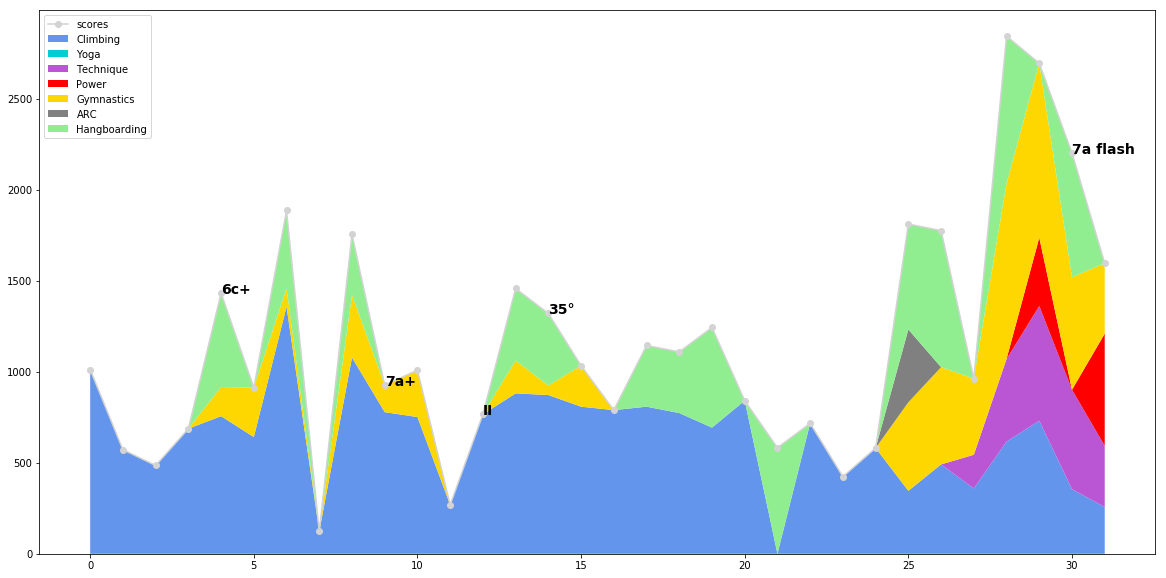

In [61]:
plot_stacked_scores(doripa)

/home/philipp/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


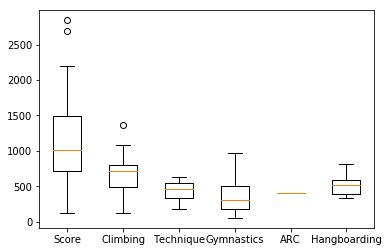

In [62]:
scores = [
    doripa[doripa.scores > 0].scores,
    doripa[doripa.climbing_scores > 0].climbing_scores,

    doripa[doripa.tech_scores > 0].tech_scores,
    doripa[doripa.gym_scores > 0].gym_scores,
    doripa[doripa.arc_scores > 0].arc_scores,

    doripa[doripa.hang_scores > 0].hang_scores,
]
labels = ['Score', 'Climbing', 'Technique', 'Gymnastics', 'ARC', 'Hangboarding']
plt.boxplot(scores, labels=labels)
plt.show()

/home/philipp/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


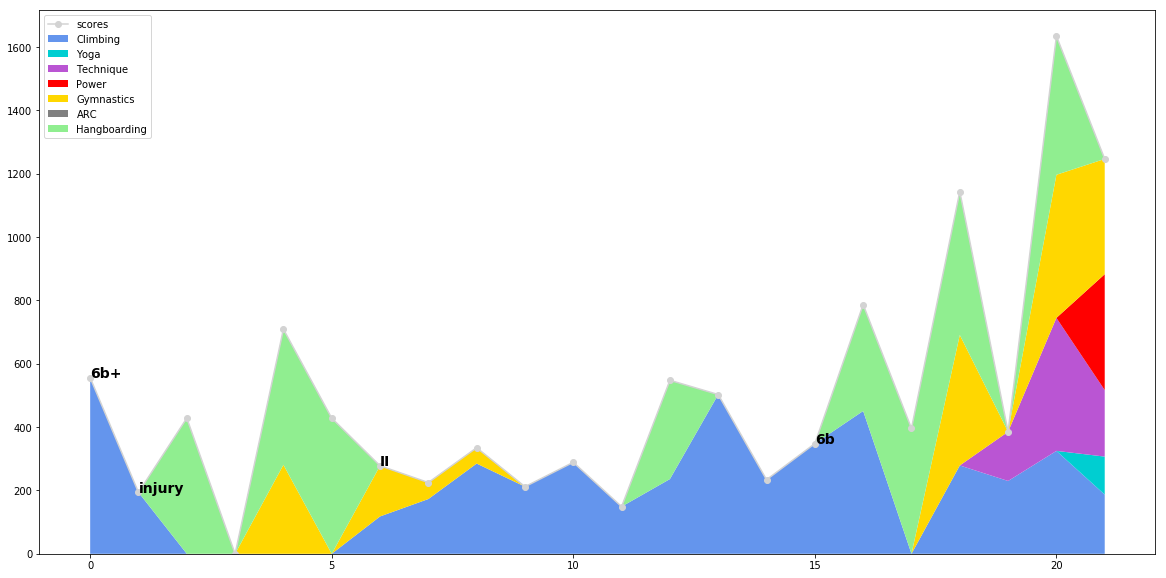

In [63]:
plot_stacked_scores(sunshine_sessions)


/home/philipp/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


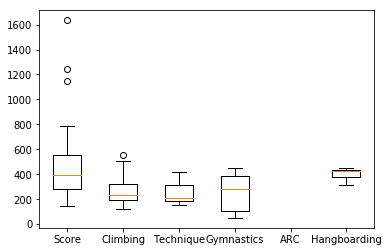

In [64]:
scores = [
    sunshine_sessions[sunshine_sessions.scores > 0].scores,
    sunshine_sessions[sunshine_sessions.climbing_scores > 0].climbing_scores,

    sunshine_sessions[sunshine_sessions.tech_scores > 0].tech_scores,
    sunshine_sessions[sunshine_sessions.gym_scores > 0].gym_scores,
    sunshine_sessions[sunshine_sessions.arc_scores > 0].arc_scores,

    sunshine_sessions[sunshine_sessions.hang_scores > 0].hang_scores,
]
labels = ['Score', 'Climbing', 'Technique', 'Gymnastics', 'ARC', 'Hangboarding']
plt.boxplot(scores, labels=labels)
plt.show()
# plt.boxplot(sunshine_sessions[sunshine_sessions.gym_scores > 0].gym_scores)

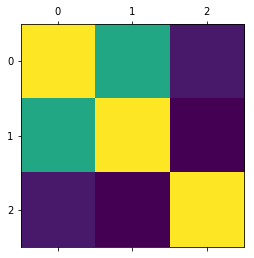

In [65]:
plt.matshow(doripa[['total', 'total6', 'scores']].corr());

In [66]:
doripa[['total', 'total6', 'scores']].corr()

,total,total6,scores
total,1.000000,0.693528,0.295461
total6,0.693528,1.000000,0.242195
scores,0.295461,0.242195,1.000000


In [67]:
doripa['total'].corr(doripa['total6'])

0.69352830597595561

In [68]:
doripa['total'].corr(doripa['scores'])

0.29546074005136308

In [69]:
doripa['scores'].corr(doripa['total6'])

0.2421952529967086

In [70]:
sunshine_sessions.corr()['scores']

cycle               0.183385
kg                 -0.103754
hang                0.394817
core                0.843700
block               0.866441
arc                      NaN
anta                0.301914
legs               -0.094247
L-Sit               0.092430
tech                0.730627
power               0.422188
speed               0.422188
speed+                   NaN
yoga                0.422188
total               0.126492
total6              0.185963
4                   0.027238
5a                 -0.126436
5b                  0.233489
5c                  0.083013
6a                  0.097444
6a+                 0.051275
6b                  0.004613
6b+                 0.581279
6c                  0.131822
6c+                      NaN
7a                  0.506008
7a+                      NaN
4F2G                0.110956
3F2G                0.505037
16                  0.136410
12                  0.641900
15°                 0.481871
35°                 0.685385
45°           

In [71]:
doripa.corr()['scores']

cycle               0.279943
kg                 -0.357860
hang                0.525433
core                0.840381
block               0.733555
arc                 0.183127
anta                0.322700
legs                0.400693
L-Sit               0.072730
tech                0.699266
power               0.123118
speed               0.123118
speed+              0.432211
yoga                     NaN
total               0.295461
total6              0.242195
4                   0.216329
5a                 -0.060175
5b                  0.236301
5c                  0.118851
6a                  0.289796
6a+                -0.092258
6b                  0.126667
6b+                 0.300706
6c                  0.032646
6c+                 0.053166
7a                  0.120582
7a+                -0.131053
4F2G                0.444767
3F2G                0.459566
16                  0.151237
12                  0.559649
15°                 0.068631
35°                 0.578011
45°           